In [1]:
import os   #used for directory work
import matplotlib.patches as mpatches #used for plot legends
import matplotlib.pyplot as plt #used for creating plots
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
from Raw_Cleaner import timestamp_matcher, time_columns, file_to_df, cutter, \
    repeat, continuous_df


In [2]:
def day_trimmer(df, t_s, t_e):
    mask =(df['TIMESTAMP'] > t_s) & (df['TIMESTAMP'] < t_e) 
    df=df.loc[mask]
    return(df)

In [3]:
path = '/home/joey/Desktop/'
file ='TOA5_41733.ts_data_maintower.dat'
file = "TOA5_23364.FF2_ts_dataSTW.dat"
file = "TOA5_5714.FF2_ts_dataSTE.dat"
file = "TOA5_2679.FF2_ts_dataSTS.dat"
df_raw = day_trimmer(file_to_df(path,file), "01-30-2013","01-31-2013")

#df_raw = df_raw[:345859]

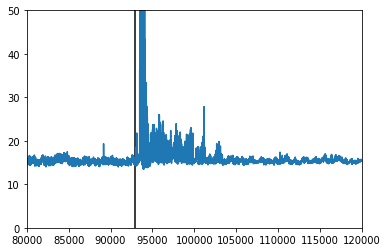

In [8]:
plt.plot(df_raw["Ts"])
plt.xlim(80000,120000)
plt.ylim(0,50)
plt.vlines(92900,0,50)

In [134]:
### n = 258500
def timestamp_finder(df_raw, n):
    lst_pre_fire = list(df_raw["Ts"][n-36000:n])
    pre_mean = np.mean(lst_pre_fire)+6*np.std(lst_pre_fire)
    residential = np.mean(lst_pre_fire)+22*np.std(lst_pre_fire)


    fire_lst, residential_lst = [],[]
    for i in range(len(df_raw["Ts"])):
        if df_raw["Ts"][i] > pre_mean:
            fire_lst.append(i)

        if df_raw["Ts"][i] > residential:
            residential_lst.append(i)

    print("Pre-Fire Mean:",pre_mean)
    print("Res. Mean:",residential) 
    print("Pre-fire Start:",df_raw["TIMESTAMP"][n-36000],"End:",df_raw["TIMESTAMP"][n])      
    print("Residental Start:",df_raw["TIMESTAMP"][residential_lst[0]],"End:",df_raw["TIMESTAMP"][residential_lst[-1]])
    print("FFP Start:",df_raw["TIMESTAMP"][residential_lst[-1]+1],"End:",df_raw["TIMESTAMP"][fire_lst[-1]] )
    print("Post-fire Start :",df_raw["TIMESTAMP"][fire_lst[-1]+1],"End:",df_raw["TIMESTAMP"][fire_lst[-1]+36001])
    return fire_lst, residential_lst

Pre-Fire Mean: 19.054334247020975
Res. Mean: 28.660390016854688
Pre-fire Start: 2013-01-30 14:08:23.900000 End: 2013-01-30 15:08:40.100000
Residental Start: 2013-01-30 15:09:38.500000 End: 2013-01-30 15:10:57.700000
FFP Start: 2013-01-30 15:10:57.800000 End: 2013-01-30 15:25:25.800000
Post-fire Start : 2013-01-30 15:25:25.900000 End: 2013-01-30 16:25:25.900000
94276


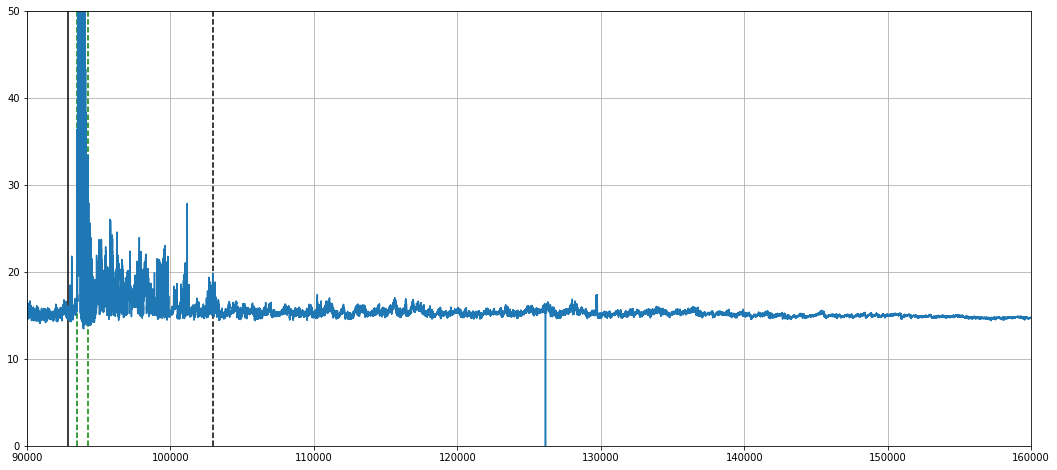

In [135]:
n =92900
fire_lst, residential_lst = timestamp_finder(df_raw, n)
plt.figure(figsize=(18,8))
plt.plot(df_raw["Ts"])
plt.xlim(90000,160000)
plt.ylim(0,50)
plt.grid()
plt.vlines(n-36000,0,500)
plt.vlines(n,0,500) 
plt.vlines(fire_lst[0],0,500, linestyle = "--")
plt.vlines(fire_lst[-1],0,500, linestyle = "--")
plt.vlines(residential_lst[0],0,500,linestyle = "--", color="g")
plt.vlines(residential_lst[-1],0,500,linestyle = "--", color="g")
print(residential_lst[-1])